# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

**To start off with, load in the demographics data for the general population into a pandas DataFrame** , and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics  ----- data. Udacity_AZDIAS_Subset.csv`
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')
azdias.head()


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [3]:
# Load in the feature summary file. ------ `Data_Dictionary.md
#feat_info = pd.read_table('Data_Dictionary.md')
#feat_info.head()

In [4]:
feat_info = pd.read_table('AZDIAS_Feature_Summary.csv',sep =';')
feat_info.head(15)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [5]:
#to use later
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [6]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).- It already did above
print(azdias.shape)
print(feat_info.shape)


(891221, 85)
(85, 4)


**the information is correct, as the feat_info df is the information about the coluns of azdias**

In [7]:
#since we will use later "Missing or Unknow" feature, i will do a deeper analysis
feat_info['missing_or_unknown'].describe()

count       85
unique       9
top       [-1]
freq        26
Name: missing_or_unknown, dtype: object

In [8]:
feat_info['missing_or_unknown'].values

array(['[-1,0]', '[-1,0,9]', '[-1,0]', '[0]', '[-1]', '[-1]', '[-1]',
       '[-1]', '[-1]', '[-1]', '[-1]', '[0]', '[]', '[]', '[-1,0]', '[0]',
       '[0]', '[0]', '[0]', '[0]', '[0]', '[-1,0]', '[-1,0]', '[0]',
       '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]',
       '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]', '[-1,9]',
       '[-1,9]', '[-1,9]', '[-1]', '[-1]', '[-1,0]', '[-1]', '[-1,9]',
       '[0]', '[]', '[]', '[-1,0]', '[-1]', '[-1,0]', '[-1,0]', '[0]',
       '[]', '[-1,0]', '[]', '[0]', '[-1]', '[-1]', '[-1,X]', '[XX]',
       '[-1,XX]', '[-1]', '[-1]', '[-1]', '[-1]', '[-1,0]', '[-1,0]',
       '[-1]', '[-1]', '[-1]', '[]', '[-1,0]', '[]', '[]', '[-1,0]', '[]',
       '[-1]', '[-1]', '[-1]', '[-1]', '[-1,0]', '[-1]', '[-1]', '[-1,9]',
       '[-1,0]', '[-1,9]'], dtype=object)

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [9]:
# Identify missing or unknown data values and convert them to NaNs.
print(azdias.isnull().sum().sum())



4896838


In [10]:
azdias.isnull().sum().sum()/(azdias.shape[0]*azdias.shape[1])


0.064641496131183418

**As we can see, there are a lot of values with null entrires, but the value is just 6,4% of data.**

In [11]:
feat_info['missing_or_unknown'].value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[XX]         1
[-1,0,9]     1
[-1,XX]      1
[-1,X]       1
Name: missing_or_unknown, dtype: int64

In [12]:
#sanity checking for cleaning
azdias.columns == feat_info['attribute']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

### Since the azdias columns names are equals to feat_info attributes, i will create a solution by replacing the numbers of azdias dataset to nan when the values of feat_info are the same.


https://learn.datacamp.com/courses/intermediate-python

Use the loc and iloc examples as references. to creat a Dataset where the attributes are the index and the missing or unknows as the unique column.

In [13]:

#List of null valaues
nan_values = []

for attribute in range(feat_info.shape[0]):
    nan = feat_info.iloc[attribute]['missing_or_unknown']
    nan = nan.replace('[','').replace(']','').split(sep=',')
    nan = [int(nan) if (nan != 'X' and nan != "XX" and nan != '') else nan for nan in nan]
    nan_values.append(nan)
    
print(nan_values)

[[-1, 0], [-1, 0, 9], [-1, 0], [0], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [0], [''], [''], [-1, 0], [0], [0], [0], [0], [0], [0], [-1, 0], [-1, 0], [0], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1], [-1], [-1, 0], [-1], [-1, 9], [0], [''], [''], [-1, 0], [-1], [-1, 0], [-1, 0], [0], [''], [-1, 0], [''], [0], [-1], [-1], [-1, 'X'], ['XX'], [-1, 'XX'], [-1], [-1], [-1], [-1], [-1, 0], [-1, 0], [-1], [-1], [-1], [''], [-1, 0], [''], [''], [-1, 0], [''], [-1], [-1], [-1], [-1], [-1, 0], [-1], [-1], [-1, 9], [-1, 0], [-1, 9]]


In [14]:
#Create a Dataframe solution by nan_values list
df = pd.DataFrame({"nan":nan_values})
#set index method to use loc acessor later
df = df.set_index(feat_info['attribute'].values)
df.head()

,nan
AGER_TYP,"[-1, 0]"
ALTERSKATEGORIE_GROB,"[-1, 0, 9]"
ANREDE_KZ,"[-1, 0]"
CJT_GESAMTTYP,[0]
FINANZ_MINIMALIST,[-1]


In [15]:
for features in azdias.columns:
        azdias[features] = azdias[features].replace(df.loc[features][0],np.nan)
        
azdias.head()     

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

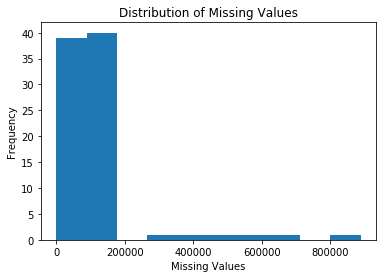

In [16]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

plt.hist(azdias.isnull().sum())
plt.xlabel("Missing Values")
plt.ylabel("Frequency")
plt.title("Distribution of Missing Values")
plt.show()

**The plot looks like a distribution skewed to right and maybe it has one or two outliers. I will do a visualization without values greater than 40,000 missing values**

**Since it isn't clear which features have more missing data than others, i will plot a horizontal bar plot to analyze**

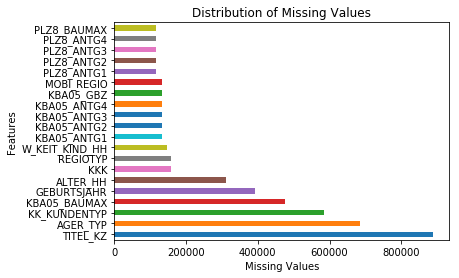

In [17]:
azdias.isnull().sum().nlargest(n=20).plot(kind='barh')

plt.xlabel("Missing Values")
plt.ylabel("Features")
plt.title("Distribution of Missing Values")
plt.show()

In [18]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.isnull().sum().describe()


count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

#### To remove outlier i opted to use Upper fence method. This method consist in any values 1.5* Interquantile above the third quantile.

In [19]:
#Calculate the third quantile
q3 = azdias.isnull().sum().quantile(.75)

#calculate the first Quantile
q1 =azdias.isnull().sum().quantile(.25)

#calculate the Interquantile Range
iqr= q3 - q1


null_upper = q3 + (1.5*iqr)

print(null_upper)

291287.5


In [20]:
#how many features has more null values than the upper fence.
(azdias.isnull().sum() > null_upper).sum()

6

**Using the upper fence method to find outliers, it shows the data has six columns to remove.**

### The Features i'll remove are "Alter_HH","GEBURTSJAHR','KBA05_BAUMAX','KK_KUNDENTYP',AGER_TYP','TITEL_KZ'.


In [21]:
#checking the shape before drop outliers
azdias.shape

(891221, 85)

In [22]:
azdias_clean = azdias.copy()

c_remove = ['ALTER_HH','GEBURTSJAHR','KBA05_BAUMAX','KK_KUNDENTYP','AGER_TYP','TITEL_KZ']

azdias_clean = azdias_clean.drop(c_remove, axis=1)


In [23]:
#checking drop
azdias_clean.shape

(891221, 79)

### Discussion 1.1.2: Assess Missing Data in Each Column

Before i cleaning data and transform to NaN some values, the azdias dataset has a total of 4896838 values. Looking to its distribution, it's clearly there some columns are outliers about the numbers os missing data. 

Looking forward on a horizontal bar plot, i have an idea which columns are the the mostly nan values. But for have  precision i opt to remove values above Upper Fence - the box plot mathematics approach. 

The IQR Method results on six features to delete: ['ALTER_HH','GEBURTSJAHR','KBA05_BAUMAX','KK_KUNDENTYP','AGER_TYP','TITEL_KZ']

Let's looking deeper on them: 

#### Personal-level features

**Geburtsjahr** - It's the year of birth. 

**Ager_Typ** - Best-ager Typology

**titel_kz** - Academic title flag

#### Household-level features

**Alter_HH** - Birthdate of head of household
**KK KUNDENTYP** - Consumer pattern over past 12 months

####  RR3 micro-cell features

**KBA05 Baumax** - Most common building type within the microcell


Three of the six deleted features are from personal level features. Since it's unknown the birthdate, the "Best-ager typology is unknown too. Academic Title flag has a lot of Nan Valaues, and this is probably due to mostly of people haven't a academic title- And of course, this feature is the mostly 'empty' of the six.

About Household features, it make senses the birthdate of head of household could be strange even to owners. And Consumer pattern could be interpreted too personal. 

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [24]:
# How much data is missing in each row of the dataset?
#Checking the top 10 values, and setting .sum() method axis=1 to be "row wise" 
azdias_clean.isnull().sum(axis=1).sum()



5035304

In [25]:
#Percentege of null values
azdias_clean.isnull().sum(axis=1).sum()/(azdias_clean.shape[0]*azdias_clean.shape[1])

0.071517643004883974

In [26]:
#sum the meana of null valaues for row to use as value to remove later
print(azdias_clean.isnull().sum(axis=1).mean())


5.64989379739


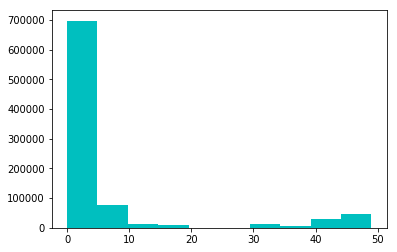

In [27]:
a = azdias_clean.isnull().sum(axis=1)



plt.hist(x=a, color = "c")

plt.show()
                              

### Reviewer Note - 

#### Here, the point I disagree with you in it, You thought in a good manner !
#### But you set the threshold value for rows splitting = 5.64 and the right value should be between 9 and 32 as the attached graph explains : the area between 9 and 32 is a gap area between the 2 areas at the borders !

I opt to choose 9 - by visual assesment method. After this number, the data wouldn't lost much data - except by values above 40 missing values

In [28]:
# Write code to divide the data into two subsets based on the number of missing
# no or few missing values, between the two subsets.
top_null = azdias_clean[azdias_clean.isnull().sum(axis=1) >= 9]
less_null = azdias_clean[azdias_clean.isnull().sum(axis=1) < 9]

print(top_null.shape)
print(less_null.shape)

(119520, 79)
(771701, 79)


In [29]:
row_top = azdias_clean.iloc[top_null.index,:]
row_less = azdias_clean.iloc[less_null.index,:]


In [30]:
# Compare the distribution of values for at least five columns where there are
#Create a variable to store top 5 columns with lowest null values
columns = azdias_clean.isnull().sum().nsmallest(n=5).index

columns
    
    

Index(['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER'],
      dtype='object')

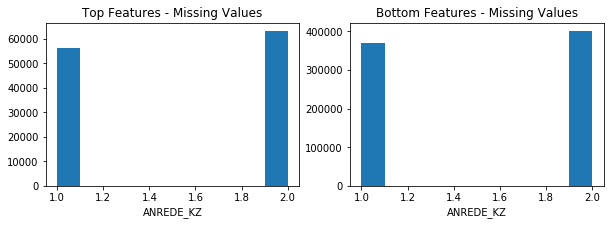

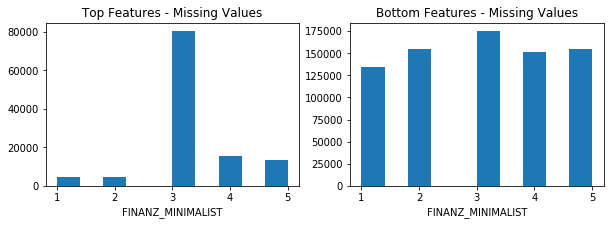

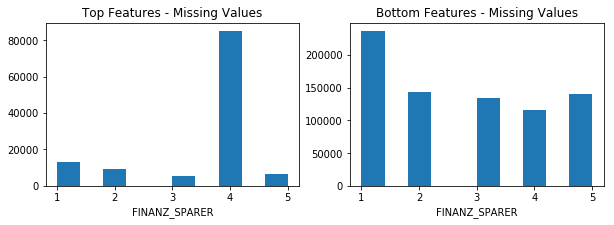

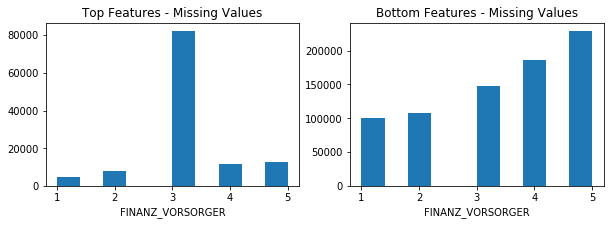

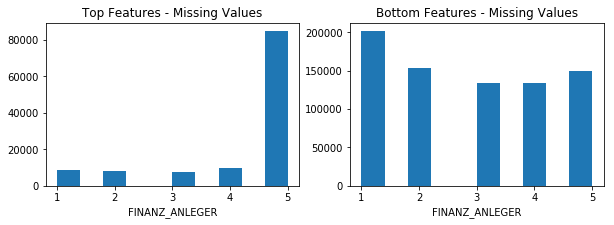

In [31]:
#I opt to .plot() from Matplotlib

for column in columns: 
    
    #Setting Figure size
    fig = plt.figure(figsize=(10,3))
    
    #selecting ax1 .add_subplot elements by setting *args as 1 row, 2 columns and the 1 and 2 index - Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html
    #Another side-by-side exemple: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
    ax1 = fig.add_subplot(121)
    ax1.hist(row_top[column])
    #Reference - https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
    ax1.set_title("Top Features - Missing Values")
    ax1.set_xlabel(column)
    
    
    
    #follow the example above
    ax2 = fig.add_subplot(122)
    ax2.hist(row_less[column])
    ax2.set_title("Bottom Features - Missing Values")
    ax2.set_xlabel(column)
    
plt.show()

In [32]:
#Delete rows higher than 5.64 null values.
azdias_clean2 = row_less.copy()

azdias_clean2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [33]:
#checking the delete
azdias_clean2.shape

(771701, 79)

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

**General information**
On the dataset after the tranasformations on columns, it has 5035304 null values. This is equivalent 7% of data. The mean of missing values by the rows is 5.64. From this value i've divided the dataset in two: The "top" data on missing values and "less" data. 

The distribution of null values over the cells is assymetric to right - mostly of cells have few missing values and some have almost 50! 


Using a for loop i've explored among five features. The Variables are: 

**Anrede_kz** - Gender - And it's the only one it's similiar each to other.

#### financial Features - 

**Finanz_Minimalist** - Low finanacial Interest

**finanz-sparer** - Money-saver

**finanz-vorsoger** - Finance Be prepared 

**finanz-Angeler** - finance Investor



Looking both profile, "The few missing Values" and "The Top missing values" looking very different! 


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [34]:
# How many features are there of each data type?
feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [35]:
feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [36]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

#Get index of the categorical values for
feat_info_cat = feat_info[feat_info['type'] == 'categorical']['attribute']

#faster way to calculate different valaues sover columns: https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
print(azdias_clean2.loc[:,feat_info_cat].nunique())


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


AGER_TYP             0
ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
TITEL_KZ             0
VERS_TYP             2
ZABEOTYP             6
KK_KUNDENTYP         0
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64


#### Binary Valaues are:

ANREDE_KZ, GREEN_AVANTGARDE, SOHO_KZ, VERS_TYP, OST_WEST_KZ

#### Multi-level Categories are: 

CJT_GESAMTTYP , FINANZTYP , GFK_URLAUBERTYP , LP_FAMILIE_FEIN , LP_FAMILIE_GROB , LP_STATUS_FEIN , LP_STATUS_GROB , NATIONALITAET_KZ , SHOPPER_TYP , ZABEOTYP , GEBAEUDETYP  , CAMEO_DEUG_2015 , CAMEO_DEU_2015



In [37]:
binary = ['NREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
multi = ['CJT_GESAMTTYP' , 'FINANZTYP' , 'GFK_URLAUBERTYP' , 'LP_FAMILIE_FEIN' ,
         'LP_FAMILIE_GROB' , 'LP_STATUS_FEIN' , 'LP_STATUS_GROB' , 'NATIONALITAET_KZ' ,
         'SHOPPER_TYP' , 'ZABEOTYP' , 'GEBAEUDETYP'  , 'CAMEO_DEUG_2015' , 'CAMEO_DEU_2015']

In [38]:
#There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
binary_df = azdias_clean2.loc[:,binary]
binary_df.head(2)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,NREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,NaN,0,1.0,2.0,W
2,NaN,1,0.0,1.0,W


In [39]:
#The Binary value taht takes on non-numeric values is "Ost_West_kz"
# Data Dictionary - Building location via former East / West Germany (GDR / FRG)
binary_df.OST_WEST_KZ.value_counts()

W    607911
O    163790
Name: OST_WEST_KZ, dtype: int64

In [40]:
# Re-encode categorical variable(s) to be kept in the analysis.
azdias_clean2['OST_WEST_KZ'] = azdias_clean2['OST_WEST_KZ'].replace("W",1).replace("O",0)
#Check the wrangling
azdias_clean2['OST_WEST_KZ'].value_counts()


1    607911
0    163790
Name: OST_WEST_KZ, dtype: int64

#### For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via OneHotEncoder), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

I Just opted to drop them

In [41]:
azdias_clean2.shape

(771701, 79)

In [42]:
azdias_clean2 = azdias_clean2.drop(multi, axis=1)
azdias_clean2.shape

(771701, 66)

#### Discussion 1.2.1: Re-Encode Categorical Features

The azdias dataset has 21 categorical features - 5 of them are binary. One of these Binary features represents the location of building - west or east.

My wrangling effort here was transform "W" into 1 and "O" in 0.

 For the Multi Level Categories, i've decided to drop them.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [43]:
feat_info[feat_info['type'] == 'mixed'].shape

(7, 4)

In [44]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


### PRAEGENDE_JUGENDJAHRE

"PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.

From dictionary: 
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)



In [45]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
#Variable for decade
#Movement
azdias_clean2['PRAEGENDE_JUGENDJAHRE'].head()

1    14.0
2    15.0
3     8.0
4     8.0
5     3.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [46]:
azdias_clean2.shape

(771701, 66)

In [47]:
#Refference: https://stackoverflow.com/questions/46920454/how-to-replace-multiple-values-with-one-value-python


#Create Decade Feature
azdias_clean2['DECADE'] = azdias_clean2['PRAEGENDE_JUGENDJAHRE'].replace(dict.fromkeys([1,2], 40 ))
azdias_clean2['DECADE'] = azdias_clean2['DECADE'].replace(dict.fromkeys([3,4], 50 ))
azdias_clean2['DECADE'] = azdias_clean2['DECADE'].replace(dict.fromkeys([5,6,7], 60 ))
azdias_clean2['DECADE'] = azdias_clean2['DECADE'].replace(dict.fromkeys([8,9], 70 ))
azdias_clean2['DECADE'] = azdias_clean2['DECADE'].replace(dict.fromkeys([10,11,12,13,14], 80 ))
azdias_clean2['DECADE'] = azdias_clean2['DECADE'].replace(dict.fromkeys([15],90 ))

#1 for mainstream 2 to avantgarde
azdias_clean2['MOVEMENT'] = azdias_clean2['PRAEGENDE_JUGENDJAHRE'].replace(dict.fromkeys([1,3,5,8,10,12,14], 1))
azdias_clean2['MOVEMENT'] = azdias_clean2['MOVEMENT'].replace(dict.fromkeys([2,4,6,7,9,11,13,15], 2 ))



print(azdias_clean2['DECADE'].value_counts())


print(azdias_clean2['MOVEMENT'].value_counts())

80.0    323893
70.0    170418
60.0    112211
50.0     72820
90.0     40684
40.0     27346
Name: DECADE, dtype: int64
1.0    577216
2.0    170156
Name: MOVEMENT, dtype: int64


In [48]:
azdias_clean2.shape

(771701, 68)

### CAMEO_INTL_2015

"CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement


In [49]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
#Wealth
#Life_stage
#wealth

#wealthy Households
azdias_clean2['WEALTH'] = azdias_clean2['CAMEO_INTL_2015'].replace(dict.fromkeys([11,12,13,14,15], 1 ))
#Prosperous Households
azdias_clean2['WEALTH'] = azdias_clean2['WEALTH'].replace(dict.fromkeys([21,22,23,24,25], 2 ))
#Comfortable Households
azdias_clean2['WEALTH'] = azdias_clean2['WEALTH'].replace(dict.fromkeys([31,32,33,34,35], 3 ))
#Less Affluent Households
azdias_clean2['WEALTH'] = azdias_clean2['WEALTH'].replace(dict.fromkeys([41,42,43,44,45], 4 ))
#Poorer Households
azdias_clean2['WEALTH'] = azdias_clean2['WEALTH'].replace(dict.fromkeys([51,52,53,54,55], 5 ))


#life_stage

#Pre-Family
azdias_clean2['LIFE_STAGE'] = azdias_clean2['CAMEO_INTL_2015'].replace(dict.fromkeys([11,21,31,41,51], 1 ))
#young
azdias_clean2['LIFE_STAGE'] = azdias_clean2['LIFE_STAGE'].replace(dict.fromkeys([12,22,32,42,52], 2 ))
#Families with school
azdias_clean2['LIFE_STAGE'] = azdias_clean2['LIFE_STAGE'].replace(dict.fromkeys([13,23,33,43,53], 3 ))
#older families
azdias_clean2['LIFE_STAGE'] = azdias_clean2['LIFE_STAGE'].replace(dict.fromkeys([14,24,34,44,54], 4 ))
#elders
azdias_clean2['LIFE_STAGE'] = azdias_clean2['LIFE_STAGE'].replace(dict.fromkeys([15,25,35,45,55], 5 ))




print(azdias_clean2['WEALTH'].value_counts())


print(azdias_clean2['LIFE_STAGE'].value_counts())

51    131800
41     90199
24     88313
14     60741
43     55285
54     44601
25     38401
22     31827
45     25524
13     25348
23     23882
55     23244
52     20207
34     18061
31     17596
15     16587
44     14455
12     12618
35     10100
32     10052
33      9521
Name: WEALTH, dtype: int64
51    131800
41     90199
24     88313
14     60741
43     55285
54     44601
25     38401
22     31827
45     25524
13     25348
23     23882
55     23244
52     20207
34     18061
31     17596
15     16587
44     14455
12     12618
35     10100
32     10052
33      9521
Name: LIFE_STAGE, dtype: int64


In [50]:
azdias_clean2.shape

(771701, 70)

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)


On this step i've decided to engineer new features with both original features of dataset.

#### PRAEGENDE

Create movement and Decade features. Movement is a binomial feature and decade is a multi-categorical. 

### CAMEO

Using the Cameo original column i've created two others: wealth and life_stage - both multi categorical


In order to create them, i did by hand with replace() method to trade original values to new numericala values

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [51]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)


In [52]:
azdias_clean2.shape

(771701, 70)

In [53]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [54]:
#Drop Mixed Columns - including CAMEO_INTL_2015 - PRAEGENDE_JUGENDJAHRE
#KBA05_BAUMAX was delete before
eng_drop = ['CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE', 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX']

azdias_clean2 = azdias_clean2.drop(eng_drop, axis=1)
azdias_clean2.shape

(771701, 64)

In [55]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [56]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


### Cleanning steps from before:

**Convert Missing Values to NAN** - I did that using feat_info column

**Removing columns with outlier numbers of Nans** 

**Removing rows with more than 5.64 values of nans**

**Transformed Binary values**

**Removed multicategoricalvalaues**

**Create 4 news columns**

**Drop 'PRAEGENDE_JUGENDJAHRE'and 'CAMEO_INTL_2015'**





In [57]:
def clean_data(df_toclean):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for features in df_toclean.columns:
        df_toclean[features] = df_toclean[features].replace(df.loc[features][0],np.nan)
    
    
    # remove selected columns and rows, ...
    drop_columns = ['ALTER_HH','GEBURTSJAHR','KBA05_BAUMAX','KK_KUNDENTYP','AGER_TYP','TITEL_KZ']
    df_toclean = df_toclean.drop(drop_columns, axis=1)
    
    rownullmean= df_toclean.isnull().sum(axis=1).mean()
    fewnull = df_toclean[df_toclean.isnull().sum(axis=1) < rownullmean]
    
    df_fewnull = df_toclean.iloc[fewnull.index,:]
    
    df_toclean2 = df_fewnull.copy()
    
    # select, re-encode, and engineer column values.
    #Transform Binary
    df_toclean2['OST_WEST_KZ'] = df_toclean2['OST_WEST_KZ'].replace("W",1).replace("O",0)
    
    multi = ['CJT_GESAMTTYP' , 'FINANZTYP' , 'GFK_URLAUBERTYP' , 'LP_FAMILIE_FEIN' ,
         'LP_FAMILIE_GROB' , 'LP_STATUS_FEIN' , 'LP_STATUS_GROB' , 'NATIONALITAET_KZ' ,
         'SHOPPER_TYP' , 'ZABEOTYP' , 'GEBAEUDETYP'  , 'CAMEO_DEUG_2015' , 'CAMEO_DEU_2015']
    
    df_toclean2 = df_toclean2.drop(multi, axis=1)
    
    #PRAEGENDE_JUGENDJAHRE
    #Create Decade Feature
    df_toclean2['DECADE'] = df_toclean2['PRAEGENDE_JUGENDJAHRE'].replace(dict.fromkeys([1,2], 40 ))
    df_toclean2['DECADE'] = df_toclean2['DECADE'].replace(dict.fromkeys([3,4], 50 ))
    df_toclean2['DECADE'] = df_toclean2['DECADE'].replace(dict.fromkeys([5,6,7], 60 ))
    df_toclean2['DECADE'] = df_toclean2['DECADE'].replace(dict.fromkeys([8,9], 70 ))
    df_toclean2['DECADE'] = df_toclean2['DECADE'].replace(dict.fromkeys([10,11,12,13,14], 80 ))
    df_toclean2['DECADE'] = df_toclean2['DECADE'].replace(dict.fromkeys([15],90 ))

    #1 for mainstream 2 to avantgarde
    df_toclean2['MOVEMENT'] = df_toclean2['PRAEGENDE_JUGENDJAHRE'].replace(dict.fromkeys([1,3,5,8,10,12,14], 1))
    df_toclean2['MOVEMENT'] = df_toclean2['MOVEMENT'].replace(dict.fromkeys([2,4,6,7,9,11,13,15], 2 ))
    
    #"CAMEO_INTL_2015"
    #wealth

    #wealthy Households
    df_toclean2['WEALTH'] = df_toclean2['CAMEO_INTL_2015'].replace(dict.fromkeys([11,12,13,14,15], 1 ))
    #Prosperous Households
    df_toclean2['WEALTH'] = df_toclean2['WEALTH'].replace(dict.fromkeys([21,22,23,24,25], 2 ))
    #Comfortable Households
    df_toclean2['WEALTH'] = df_toclean2['WEALTH'].replace(dict.fromkeys([31,32,33,34,35], 3 ))
    #Less Affluent Households
    df_toclean2['WEALTH'] = df_toclean2['WEALTH'].replace(dict.fromkeys([41,42,43,44,45], 4 ))
    #Poorer Households
    df_toclean2['WEALTH'] = df_toclean2['WEALTH'].replace(dict.fromkeys([51,52,53,54,55], 5 ))


    #life_stage

    #Pre-Family
    df_toclean2['LIFE_STAGE'] = df_toclean2['CAMEO_INTL_2015'].replace(dict.fromkeys([11,21,31,41,51], 1 ))
    #young
    df_toclean2['LIFE_STAGE'] = df_toclean2['LIFE_STAGE'].replace(dict.fromkeys([12,22,32,42,52], 2 ))
    #Families with school
    df_toclean2['LIFE_STAGE'] = df_toclean2['LIFE_STAGE'].replace(dict.fromkeys([13,23,33,43,53], 3 ))
    #older families
    df_toclean2['LIFE_STAGE'] = df_toclean2['LIFE_STAGE'].replace(dict.fromkeys([14,24,34,44,54], 4 ))
    #elders
    df_toclean2['LIFE_STAGE'] = df_toclean2['LIFE_STAGE'].replace(dict.fromkeys([15,25,35,45,55], 5 ))
    
    #drop mixed columns
    eng_drop = ['CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE', 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX']
    df_toclean2 = df_toclean2.drop(eng_drop, axis=1)
    
    
    # Return the cleaned dataframe.
    return df_toclean2
    
customers_clean = clean_data(customers)
customers_clean.shape


(139424, 64)

### Customers Clean Sanity check

In [58]:
#coluns with azdiaas
customers_clean.columns == azdias_clean2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

### Next Steps

- Removing All Missing Data or applying an Imputer
- Use Standard Scaler to scaling function- Scalling each feature to mean 0 and std 1
- use .fit_tranform() to apply the transformation 

In [59]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.preprocessing import Imputer

imp_mean = Imputer(missing_values = np.nan, strategy= 'mean')

azdias_clean2_imp = imp_mean.fit_transform(azdias_clean2)

#Since .fit_tranform has changed the azdias to numpy.ndarray need to transform to df again
azdias_clean2_imp = pd.DataFrame(azdias_clean2_imp, columns = azdias_clean2.columns)

azdias_clean2_imp.head(2)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,80.0,1.0,51.0,51.0
1,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,90.0,2.0,24.0,24.0


In [60]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


azdias_clean_scal = pd.DataFrame(scaler.fit_transform(azdias_clean2_imp), columns = azdias_clean2.columns)


#checking if the columns names still there

azdias_clean_scal.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-1.764071,0.959073,-1.488002,1.539656,-1.043931,1.468403,0.981832,1.326992,-0.531851,1.076198,...,0.413418,1.431831,0.561157,-0.175773,-0.134627,0.678623,0.753935,-0.551710,1.097550,1.097550
1,0.200484,0.959073,-1.488002,0.866704,-1.769993,-0.569520,0.264219,1.326992,1.880228,1.076198,...,-0.967599,0.399419,0.561157,-0.175773,-0.134627,-0.796743,1.580137,1.871551,-0.830605,-0.830605
2,1.182761,0.959073,0.690044,-0.479200,1.134255,-0.569520,-1.171006,-0.819321,-0.531851,-0.276875,...,-0.967599,-0.632994,0.561157,-1.181486,-1.005500,-0.059060,-0.072267,-0.551710,-1.687563,-1.687563
3,0.200484,-1.042673,0.690044,0.193752,0.408193,-1.248828,0.264219,-0.819321,-0.531851,1.076198,...,0.413418,-0.632994,-0.342605,0.829939,0.300809,1.416306,-0.072267,-0.551710,0.526245,0.526245
4,-1.764071,0.959073,-0.035971,-1.152152,1.134255,-0.569520,-0.453393,1.326992,-0.531851,1.076198,...,0.413418,1.431831,1.464918,-1.181486,-1.005500,-0.059060,-1.724671,-0.551710,1.311789,1.311789


### Discussion 2.1: Apply Feature Scaling

Since i've removed the outliers nan values from columns and rows, i chose to imput mean values on the left NaNs.

For the feature scalling - the method was StandardScaler(0)

On both cases, i've had to used pd.DataFrame, since the output was numpy.ndarray

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [61]:
from sklearn.decomposition import PCA

In [62]:
# Apply PCA to the data.
pca = PCA()
x_pca = pca.fit_transform(azdias_clean_scal)



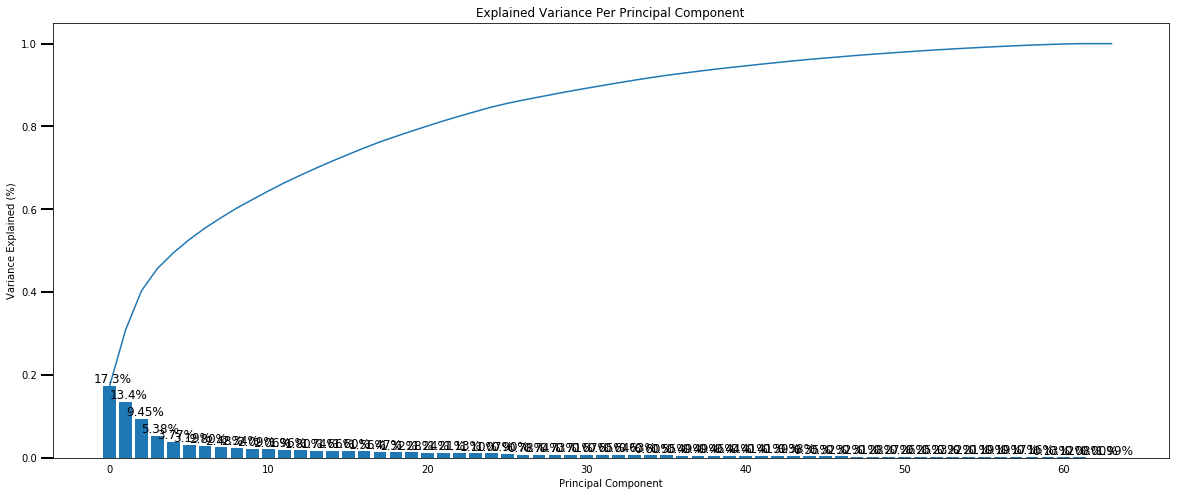

In [63]:
# Investigate the variance accounted for by each principal component.
#Function from 'interpret_PCA_Results_SC' notebook

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)


In [64]:
print(pca.explained_variance_ratio_.sum())

1.0


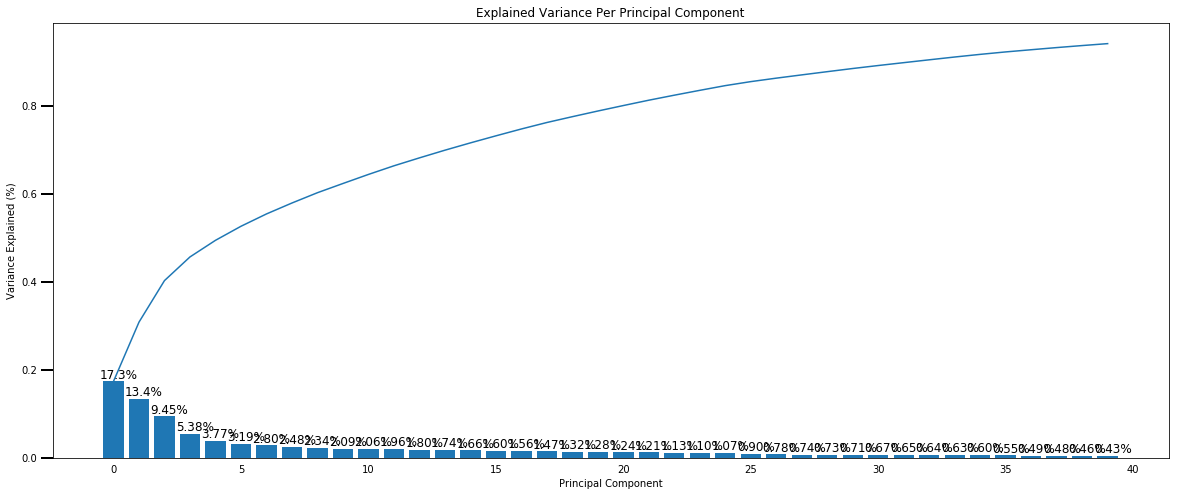

In [65]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=40)
x_pca = pca.fit_transform(azdias_clean_scal)

scree_plot(pca)



In [66]:
print(pca.explained_variance_ratio_.sum())
print(pca)

0.942197012909
PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


### Discussion 2.2: Perform Dimensionality Reduction

Using the pca with n_components=40 as parameters the results were 0.94 from "ex1plained_variance_ratio" or 95% of variability can be explaineed by 40 features.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [67]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

#Two References
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn


def weights_df(pca, comp):
    
    #Pca Operation inside to avoid interferences from any other pca operation from before
    pca = PCA(n_components= comp)
    pca.fit_transform(azdias_clean_scal)
    
    ##https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    #take from this module '.components_' method 
    #The Df ideia comes from this stackoverflow -#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
    weights_df = pd.DataFrame(pca.components_,columns=azdias_clean_scal.columns)
    
    #for grupby, i've to use comp-1 index - since n_components =0 leads to zero values among columns
    sort = weights_df.iloc[comp-1].sort_values(ascending=False)
    
    
    
    return sort

weights_df(pca,1)
  
 

PLZ8_ANTG3               0.229604
PLZ8_ANTG4               0.221725
WEALTH                   0.215150
LIFE_STAGE               0.215150
HH_EINKOMMEN_SCORE       0.207746
ORTSGR_KLS9              0.198502
EWDICHTE                 0.196816
FINANZ_HAUSBAUER         0.169107
PLZ8_ANTG2               0.156758
KBA05_ANTG4              0.155204
ARBEIT                   0.148121
RELAT_AB                 0.138492
ANZ_HAUSHALTE_AKTIV      0.138299
KBA05_ANTG3              0.136973
FINANZ_SPARER            0.122382
SEMIO_PFLICHT            0.092914
SEMIO_REL                0.089549
SEMIO_RAT                0.076042
REGIOTYP                 0.074534
SEMIO_TRADV              0.066479
SEMIO_MAT                0.065030
SEMIO_FAM                0.063508
DECADE                   0.059785
SEMIO_KULT               0.055241
FINANZ_UNAUFFAELLIGER    0.052149
FINANZ_ANLEGER           0.049709
W_KEIT_KIND_HH           0.046055
KKK                      0.045991
SEMIO_KAEM               0.043999
PLZ8_HHZ      

In [68]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weights_df(pca,2)
  

ALTERSKATEGORIE_GROB     0.271399
FINANZ_VORSORGER         0.242295
SEMIO_ERL                0.238307
SEMIO_LUST               0.189622
RETOURTYP_BK_S           0.163900
SEMIO_KRIT               0.116255
W_KEIT_KIND_HH           0.115483
SEMIO_KAEM               0.107394
FINANZ_HAUSBAUER         0.100835
ANREDE_KZ                0.090159
FINANZ_MINIMALIST        0.087694
PLZ8_ANTG3               0.067595
EWDICHTE                 0.067164
SEMIO_DOM                0.066467
ORTSGR_KLS9              0.065623
WOHNDAUER_2008           0.064964
PLZ8_ANTG4               0.064022
WEALTH                   0.059845
LIFE_STAGE               0.059845
KBA05_ANTG4              0.051579
ARBEIT                   0.050926
RELAT_AB                 0.048899
ANZ_HAUSHALTE_AKTIV      0.047171
PLZ8_ANTG2               0.046809
HH_EINKOMMEN_SCORE       0.035419
VERS_TYP                 0.030408
KBA05_ANTG3              0.028606
ANZ_HH_TITEL             0.026416
REGIOTYP                 0.015895
PLZ8_HHZ      

In [69]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weights_df(pca,3)
  

SEMIO_VERT               0.347090
SEMIO_SOZ                0.262464
SEMIO_FAM                0.248051
SEMIO_KULT               0.232137
FINANZ_MINIMALIST        0.159721
RETOURTYP_BK_S           0.109796
FINANZ_VORSORGER         0.103182
W_KEIT_KIND_HH           0.091761
ALTERSKATEGORIE_GROB     0.082695
SEMIO_REL                0.067496
SEMIO_LUST               0.067061
SEMIO_MAT                0.051839
GREEN_AVANTGARDE         0.047164
MOVEMENT                 0.045334
ORTSGR_KLS9              0.041722
PLZ8_ANTG4               0.041322
EWDICHTE                 0.041236
PLZ8_ANTG3               0.040911
WOHNDAUER_2008           0.033814
ARBEIT                   0.032145
RELAT_AB                 0.028858
PLZ8_ANTG2               0.027305
LIFE_STAGE               0.026886
WEALTH                   0.026886
KBA05_ANTG4              0.024591
ANZ_HAUSHALTE_AKTIV      0.023305
VERS_TYP                 0.014941
ANZ_HH_TITEL             0.012460
ANZ_TITEL                0.009541
KBA05_ANTG3   

### Discussion 2.3: Interpret Principal Components

The analysis of the weights from the three first components are: 

### **1 - First Component** - 

**TOP 3 Values**

- PLZ8_ANTG3               0.227675
- PLZ8_ANTG4               0.219773
- WEALTH                   0.213333 

The two first features are about the number of famaily houses on the plz8 region
Wealth is about how wealthy is the household

### **2 - Second Component** - 

- ALTERSKATEGORIE_GROB     0.266675
- FINANZ_VORSORGER         0.237690
- SEMIO_ERL                0.237626

About the second component it seens is about the tipology of personality, finance and age. It's abou a categorie a person recieves 

### **3 - Third Component** - 

- SEMIO_VERT               0.348709
- SEMIO_SOZ                0.262958
- SEMIO_FAM                0.249254

All the features of the third component is about the personality dimension.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

### **A Small dataset from your original data is a sample from a population.**

Searching by methods to sample, i've found .sample() from pandas.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample

But i've got a problem: AttributeError: 'numpy.ndarray' object has no attribute 'head' 
It isn't a dataframe.

Inside the documentation they indicate:

"See also

numpy.random.choice
Generates a random sample from a given 1-D numpy array."

### Reference: https://stackoverflow.com/questions/43664994/numpy-random-choice-vs-random-choice

In [70]:
#Left .sample here for mapping metodologies 
#x_pca.sample(frac=0.3)

In [71]:
#checking pca array before
x_pca.shape

(771701, 40)

In [72]:
# Get the referrence from stack overflow -https://stackoverflow.com/questions/43664994/numpy-random-choice-vs-random-choice
# Relatedly, if you want to randomly sample rows of a 2D matrix like this
# x = np.array([[1, 100], [2, 200], [3, 300], [4, 400]])
# then you can do something like this:
# n_rows = x.shape[0]
# x[np.random.choice(n_rows, size=n_rows, replace=True), :]

#I replicate the arguments of random.choice. But set off replace, because the values must be original one
xpca_sample = x_pca[np.random.choice(x_pca.shape[0], size = x_pca.shape[0] , replace = False )]

#original size
print(xpca_sample.shape)

#The size stills the same, let's  multiply the size argument
#Must use be a Int - TypeError: 'float' object cannot be interpreted as an integer
xpca_sample = x_pca[np.random.choice(x_pca.shape[0], size = int(x_pca.shape[0] * 0.3) , replace = False )]

#Sample Size
print(xpca_sample.shape)



(771701, 40)
(231510, 40)


**I choosed to 30% of total value to build the sample dataset. the value ir arbitrary, since it's just to be a representative part of the original data**

In [73]:
from sklearn.cluster import KMeans 

#'get_Kmean_score' function get from 'Changing k - solution' notebook from lesson 1 momdule.

def get_Kmeans_score(data,center):
    
    kmeans = KMeans(center)
    
    model = kmeans.fit(data)
    
    #Para se obter um score é necessário usar essa função
    scores = np.abs(model.score(data))
    
    return scores



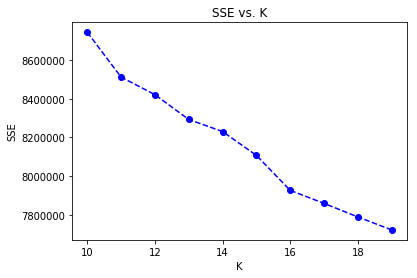

In [74]:
scores = []
centers = list(range(10,20))

for center in centers:
    scores.append(get_Kmeans_score(xpca_sample, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

### Reviewer Note - 
You successfully made good steps here and decided to keep 18 clusters to cluster the data in them, Well Done !
But you should re-run the cells here again after you fix the error in the pre-processing steps to decide the number of clusters will you cluster the dataset samples into them if they will change or not ?

#### It Has changed to 17

In [75]:
#scores = []
#centers = list(range(8,30))

#for center in centers:
    #scores.append(get_Kmeans_score(xpca_sample, center))
    
#plt.plot(centers, scores, linestyle='--', marker='o', color='b');
#plt.xlabel('K');
#plt.ylabel('SSE');
#plt.title('SSE vs. K');

** Left above my attempt to more clusters, although this only take more time to execute.

In [76]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

#Take from Udacity notebook 

#new Kmeans value of number of clusters
kmeans= KMeans(n_clusters=17)

# Then fit the model to your data using the fit method
model= kmeans.fit(x_pca)

# Finally predict the labels on the same data to show the category that point belongs to
azdias_labels= model.predict(x_pca)
azdias_labels

array([12,  2, 15, ..., 13,  4, 11], dtype=int32)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [77]:
# Load in the customer demographics data.
#It was already loaded at first section and cleaned by 
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,4.0,1,5,1,5,1,2,2,1,1.0,...,0.0,5.0,5.0,1.0,2.0,1.0,50.0,2.0,13,13
2,4.0,2,5,1,5,1,4,4,1,2.0,...,1.0,3.0,2.0,3.0,5.0,3.0,50.0,2.0,34,34
3,4.0,1,5,1,5,2,1,2,0,2.0,...,0.0,3.0,4.0,1.0,3.0,1.0,40.0,1.0,24,24
4,3.0,1,3,1,4,4,5,2,0,3.0,...,1.0,3.0,3.0,3.0,5.0,1.0,70.0,1.0,41,41
5,3.0,1,5,1,5,1,2,3,1,3.0,...,1.0,5.0,5.0,3.0,7.0,5.0,50.0,2.0,34,34


- Removing All Missing Data or applying an Imputer
- Use Standard Scaler to scaling function- Scalling each feature to mean 0 and std 1
- use .fit_tranform() to apply the transformation 

#### Removing missing data using Imputer

In [78]:

#Use the same imputer from azdias
customers_clean_imp = imp_mean.fit_transform(customers_clean)

#Since .fit_tranform has changed the azdias to numpy.ndarray need to transform to df again
customers_clean_imp = pd.DataFrame(customers_clean_imp, columns = customers_clean.columns)
#checking the if still has null values
customers_clean_imp.isnull().sum().sum()

0

#### Feature Scalling the Dataset

In [79]:
customers_scal = pd.DataFrame(scaler.fit_transform(customers_clean_imp), columns = customers_clean_imp.columns)
#checking feature scalling
customers_scal.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,0.700092,-0.702494,0.719600,-0.512816,0.512748,-0.598078,0.158443,-0.564477,0.997908,-1.260624,...,-0.850024,1.466716,1.370435,-1.812933,-1.448086,-1.339383,-0.662649,0.994014,-1.200002,-1.200002
1,0.700092,1.423500,0.719600,-0.512816,0.512748,-0.598078,2.229586,0.956607,0.997908,0.044242,...,0.724342,-0.682171,-1.613386,0.172995,-0.056052,0.071280,-0.662649,0.994014,0.342323,0.342323
2,0.700092,-0.702494,0.719600,-0.512816,0.512748,0.402611,-0.877128,-0.564477,-1.002097,0.044242,...,-0.850024,-0.682171,0.375828,-1.812933,-0.984075,-1.339383,-1.438846,-1.013824,-0.392117,-0.392117
3,-0.678551,-0.702494,-1.246045,-0.512816,-0.680512,2.403989,3.265158,-0.564477,-1.002097,1.349108,...,0.724342,-0.682171,-0.618779,0.172995,-0.056052,-1.339383,0.889744,-1.013824,0.856432,0.856432
4,-0.678551,-0.702494,0.719600,-0.512816,0.512748,-0.598078,0.158443,0.196065,0.997908,1.349108,...,0.724342,1.466716,1.370435,0.172995,0.871970,1.481942,-0.662649,0.994014,0.342323,0.342323


#### PCA to reduction

In [80]:
customers_pca = pca.fit_transform(customers_scal)

#### Kmeans Predict

In [81]:
# Then fit the model to your data using the fit method
model= kmeans.fit(customers_pca)

# Finally predict the labels on the same data to show the category that point belongs to
customers_labels= model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

From the prints above, i've checked the transformations and the results on the predicted labels

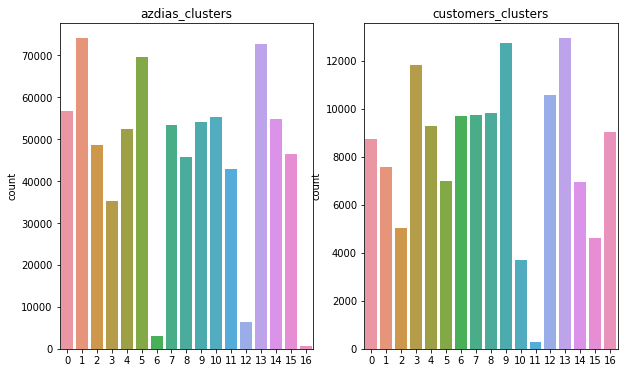

In [82]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

fig = plt.figure(figsize=(10,6))
#fig1
ax1 = fig.add_subplot(121)
ax1 = sns.countplot(azdias_labels)
ax1.set_title("azdias_clusters")  
#fig2
ax2 = fig.add_subplot(122)
ax2 = sns.countplot(customers_labels)
ax2.set_title("customers_clusters")

plt.show()

### Overrepressented - 12
### Underrepressented -11



In [86]:
#Referrence - https://stackoverflow.com/questions/49885007/how-to-use-scikit-learn-inverse-transform-with-new-values 
#scal.inverse_transform(pca.inverse_transform(clf.cluster_centers_))
#scal - Scaler
# pca - pca
#clf - Kmeans(n_clusters = x)

### Overrepresented

In [96]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?


#scal.inverse_transform(pca.inverse_transform(clf.cluster_centers_))
cluster12= scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[12]))

over = pd.Series(cluster12, index = customers_scal.columns)

over


ALTERSKATEGORIE_GROB        3.614465
ANREDE_KZ                   1.048465
FINANZ_MINIMALIST           4.956607
FINANZ_SPARER               1.192078
FINANZ_VORSORGER            4.773863
FINANZ_ANLEGER              1.635868
FINANZ_UNAUFFAELLIGER       1.594397
FINANZ_HAUSBAUER            2.049245
GREEN_AVANTGARDE            0.073931
HEALTH_TYP                  2.232853
RETOURTYP_BK_S              3.657849
SEMIO_SOZ                   4.722898
SEMIO_FAM                   4.441584
SEMIO_REL                   3.461154
SEMIO_MAT                   2.463096
SEMIO_VERT                  6.049253
SEMIO_LUST                  5.321964
SEMIO_ERL                   4.817660
SEMIO_KULT                  4.736606
SEMIO_RAT                   2.569369
SEMIO_KRIT                  2.962775
SEMIO_DOM                   3.059380
SEMIO_KAEM                  2.813328
SEMIO_PFLICHT               2.869450
SEMIO_TRADV                 2.932716
SOHO_KZ                     0.009753
VERS_TYP                    1.548379
A

# Underrepresented

In [95]:
cluster11= scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[11]))



under = pd.Series(cluster11, index = customers_scal.columns)
under


ALTERSKATEGORIE_GROB        3.680597
ANREDE_KZ                   1.483918
FINANZ_MINIMALIST           2.663311
FINANZ_SPARER               1.101841
FINANZ_VORSORGER            4.859201
FINANZ_ANLEGER              1.124102
FINANZ_UNAUFFAELLIGER       1.141154
FINANZ_HAUSBAUER            4.488329
GREEN_AVANTGARDE            0.189462
HEALTH_TYP                  1.698340
RETOURTYP_BK_S              4.348276
SEMIO_SOZ                   4.600974
SEMIO_FAM                   3.861906
SEMIO_REL                   2.508002
SEMIO_MAT                   3.943577
SEMIO_VERT                  4.557573
SEMIO_LUST                  6.325671
SEMIO_ERL                   5.585166
SEMIO_KULT                  2.930093
SEMIO_RAT                   2.400421
SEMIO_KRIT                  4.468374
SEMIO_DOM                   4.401542
SEMIO_KAEM                  4.114445
SEMIO_PFLICHT               1.767094
SEMIO_TRADV                 1.784779
SOHO_KZ                     0.017971
VERS_TYP                    1.615403
A

### Discussion 3.3: Compare Customer Data to Demographics Data

**Cluster 12** is overrepresented of customer data file compared to general population.
The carecteristics of the group are low and almost very low on "finanz_minimalist" and high "finanz hausbauer", 7% are members of "Green Avantgarde" an environmental sustainability. Great average on "incentive-receptive Normal-Returner". the region they live is on "average share of 1-2 family homes" with "low movement on the region. The Lenght of residence is 7-10 years

**cluster 11** in underpressented of customer data compared to azdias data.
They are high finanz minimalists and low "finanz_hausbauer".18% are member of Green avantgarde. The region has a Very high movement. The Lenght of Residence is 5-6 years



> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.